## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

### Semana 3 - Redes Neurais Artificiais

In [1]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

from sklearn import datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from tensorflow import keras

print('Setup completo!')

Setup completo!


#### Aula 01 e 02 - Adaline e Regra Delta e Rede Perceptron

##### Perceptron

Vamos classificar as flores de acordo com a espécie apartir de um perceptro, mais especificamente por uma adaline

In [2]:
iris = datasets.load_iris()

In [3]:
# Setosa = 0 e Versicolor = 1 
X = iris['data'][:, (2, 3)][(iris['target']==0)|(iris['target']==1)]
y = iris['target'][(iris['target']==0)|(iris['target']==1)]

In [4]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred # Setosa = 0 e Versicolor = 1 

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

In [5]:
per_clf = Perceptron(max_iter=2000, tol=1e-3)
#max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0]/ per_clf.coef_[0][1]
b = -per_clf.intercept_/ per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


In [6]:
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

In [7]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

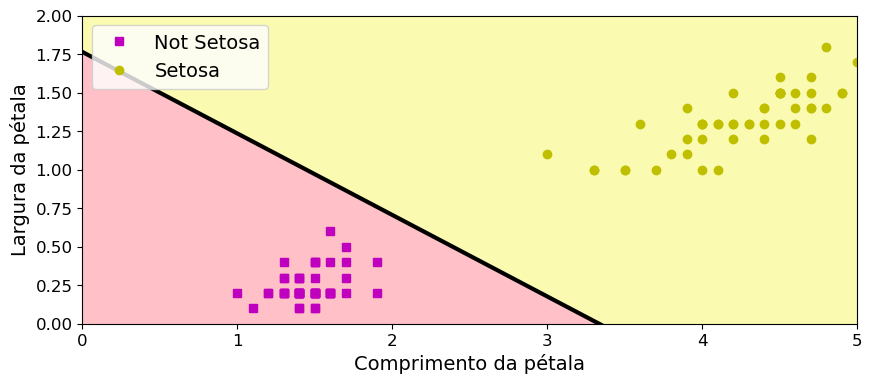

In [8]:
custom_cmap = ListedColormap(['#ffc0c8', '#fafab0'])

plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], 'ms', label='Not Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Setosa')
plt.plot([axes[0], axes[1]], [a*axes[0]+b, a*axes[1]+b], 'k-', linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.axis(axes)

plt.show()

***

#### Aula 03 - Rede Perceptron Multicamadas (clf)



Nesse estudo em questão a base de dados utilizas são de peças de vestuário e esse é um problema multi-classe, ou seja, um peça pode pertencer a diferentes classes. A resposta que esperamos é binária (0 ou 1)

In [9]:
# carregando o conjunto

fashion = keras.datasets.fashion_mnist

In [10]:
# divisão dos dados de treino e de teste
(X_trainf, y_trainf), (X_test, y_test) = fashion.load_data()
X_trainf.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [16]:
# inteiro de 8 bytes positivo
X_trainf.dtype

dtype('uint8')

In [14]:
type(X_trainf)

numpy.ndarray

##### Separação dos dados para validação que ocorrerá ao longo do treinamento

In [21]:
# o valor de cada pixel pode variar. 
# No nosso caso essa variação é de 255
X_test[0].max(), X_test[0].min()

(255, 0)

In [23]:
# buscando que não haja diferenciação entre os pixels por conta
# dos seus valores optou-se normalizar-los em relação ao valor
# maximo
X_valid, X_train = X_trainf[:5000]/255.,X_trainf[5000:]/255.
y_valid, y_train = y_trainf[:5000],y_trainf[5000:]
X_test = X_test/255.

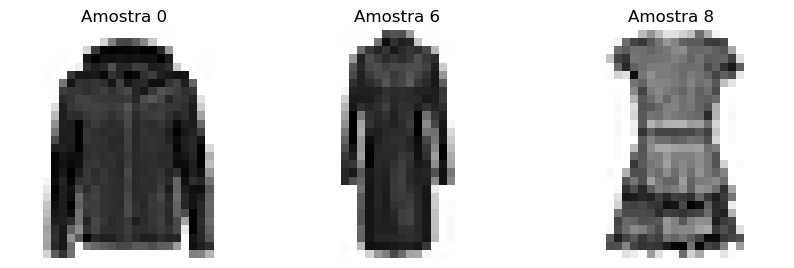

In [30]:
plt.figure(figsize=(10,4))

plt.subplot(131)
plt.imshow(X_train[0], cmap='binary')
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[6], cmap='binary')
plt.title('Amostra 6')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[8], cmap='binary')
plt.title('Amostra 8')
plt.axis('off')

plt.show()

In [32]:
# cada classe é representado por um número
print(y_train)
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

[4 0 7 ... 3 0 5]


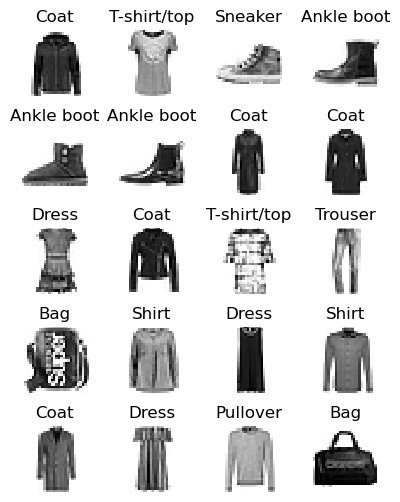

In [38]:
n_rows = 5
n_cols = 4
plt.figure(figsize= (n_cols * 1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Criando o modelo PMC 
MultiCamadas Perceptron

In [41]:
# Relu = rectified linear unit 
# como temos 10 classes no nosso problema [0-9] devemos usar 10 neuronios na ultima camada

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28])) # achata a matriz à um vetor (1,28*28)
# model.add(keras.layers.Dense(300, activation='relu')) # primeira camada com 300 neuronios
# model.add(keras.layers.Dense(100, activation='relu')) # segunda camanada com 100 neuronios
# model.add(keras.layers.Dense(10,activation='softmax')) # cada de saida 10 neuronios e ativacao multiclasse

In [52]:
# criando o modelo mais diretamente

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [54]:
# Verificando a estrutura do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
# verificando as camadas do modelo
model.layers

In [47]:
hidden1 = model.layers[1]

In [50]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03918226,  0.02553893, -0.06621392, ..., -0.0313748 ,
        -0.03456251,  0.05323359],
       [-0.02221602, -0.03072221, -0.06469403, ..., -0.07090092,
         0.02363542,  0.04936712],
       [ 0.00742475,  0.05772896, -0.06824926, ..., -0.03758564,
        -0.02469287,  0.06272075],
       ...,
       [ 0.05108541,  0.03505711,  0.01839999, ...,  0.06376961,
        -0.06187584, -0.01693632],
       [ 0.00120951,  0.00948168,  0.04086358, ...,  0.06553426,
         0.05544117,  0.02306417],
       [-0.01862299,  0.02411059, -0.05910955, ...,  0.01464966,
        -0.02691249,  0.01892934]], dtype=float32)

In [51]:
weights.shape, biases.shape

((784, 300), (300,))

In [53]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

##### Treinando o modelo PMC 
MultiCamadas Perceptron

In [55]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(
                        X_valid, 
                        y_valid
                        )
                    )

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7233 - accuracy: 0.7610 - val_loss: 0.5007 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4931 - accuracy: 0.8277 - val_loss: 0.4570 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4468 - accuracy: 0.8433 - val_loss: 0.4372 - val_accuracy: 0.8440
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4195 - accuracy: 0.8533 - val_loss: 0.4008 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3990 - accuracy: 0.8594 - val_loss: 0.3883 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8652 - val_loss: 0.3856 - val_accuracy: 0.8628
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3688 - accuracy: 0.8702 - val_loss: 0.3718 - val_accuracy:

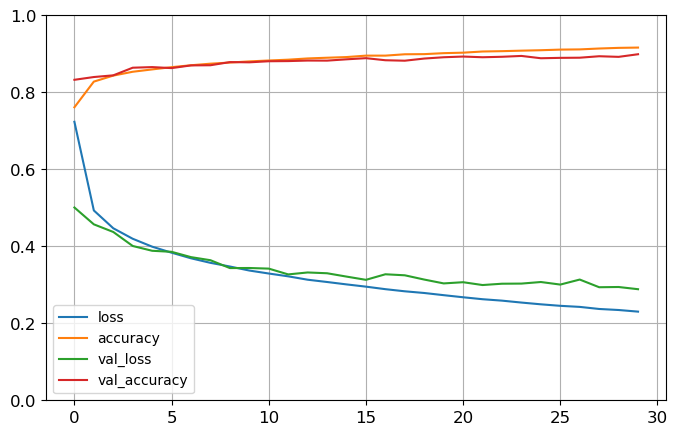

In [58]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8827


[0.32535016536712646, 0.8827000260353088]

In [60]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 155ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [61]:
list(y_test[:3])

[9, 2, 1]

In [62]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [64]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [63]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

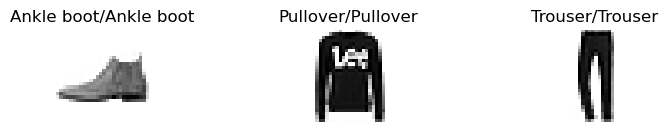

In [65]:
n_rows = 1
n_cols = 3
plt.figure(figsize= (n_cols * 3, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]] +'/'+ class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***

#### Aula 